In [1]:
import requests
import json
import pandas as pd
from google.oauth2 import service_account
from googleapiclient.discovery import build
from adtk.data import validate_series
from adtk.visualization import plot
from adtk.detector import PersistAD

In [2]:
#Функция коннекта к GSC API
def connect(key):
    
    scope = ['https://www.googleapis.com/auth/webmasters']
    credentials = service_account.Credentials.from_service_account_file(key, 
                                                                        scopes=scope)
    service = build(
        'webmasters',
        'v3',
        credentials=credentials
    )
    
    return service

key = 'client_secrets.json'
service = connect(key)

In [3]:
def query(service, site_url, payload):
    
    response = service.searchanalytics().query(siteUrl=site_url, body=payload).execute()
    
    results = []
    
    for row in response['rows']:    
        data = {}
        
        for i in range(len(payload['dimensions'])):
            data[payload['dimensions'][i]] = row['keys'][i]

        data['clicks'] = row['clicks']
        data['impressions'] = row['impressions']
        data['ctr'] = round(row['ctr'] * 100, 2)
        data['position'] = round(row['position'], 2)        
        results.append(data)
    
    return pd.DataFrame.from_dict(results)

In [14]:
#Выбираем даты и какой сайт будем анализировать
payload = {
    'startDate': "2020-01-01",
    'endDate': "2022-01-01",
    'dimensions': ["date"],  
    'rowLimit': 25000,
    'startRow': 0
}

site_url = "https://exomania.com.ua"

df = query(service, site_url, payload)
df.head()

,date,clicks,impressions,ctr,position
0,2020-11-03,0,1,0.00,88.00
1,2020-11-04,0,49,0.00,6.31
2,2020-11-05,6,147,4.08,9.20
3,2020-11-06,5,125,4.00,11.02
4,2020-11-07,1,120,0.83,9.29


In [15]:
#Эта функция преобразует scalar, array-like, Series or DataFrame/dict объект в объект даты и времени pandas.
#Так как для модели нужны данные даты не в формате date а в формате datetime
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')

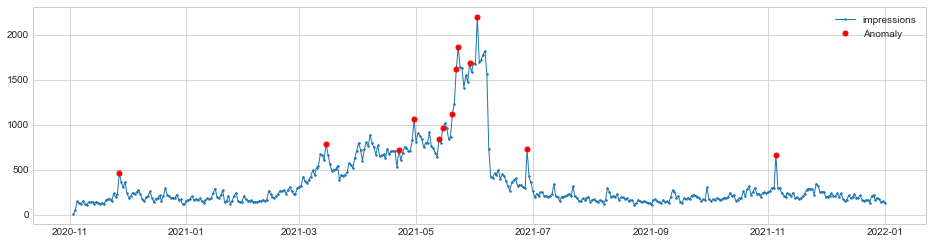

In [16]:
validate_impressions = validate_series(df['impressions'])

persist_ad = PersistAD(c=2, side='positive')
anomalies = persist_ad.fit_detect(validate_impressions)

chart = plot(validate_impressions, 
     anomaly=anomalies, 
     ts_linewidth=1, 
     ts_markersize=3, 
     anomaly_markersize=5, 
     anomaly_color='red', 
     anomaly_tag='marker')

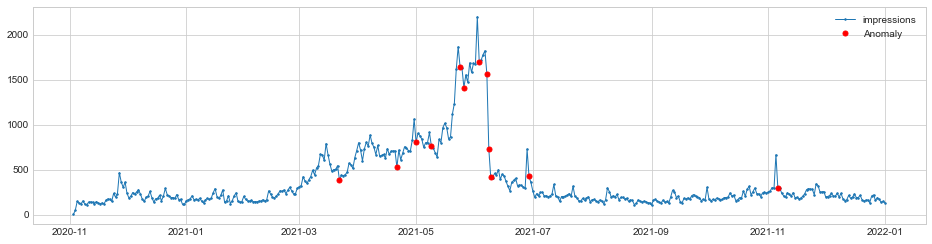

In [17]:
validate_impressions = validate_series(df['impressions'])

persist_ad = PersistAD(c=2, side='negative')
anomalies = persist_ad.fit_detect(validate_impressions)

chart = plot(validate_impressions, 
     anomaly=anomalies, 
     ts_linewidth=1, 
     ts_markersize=3, 
     anomaly_markersize=5, 
     anomaly_color='red', 
     anomaly_tag='marker')

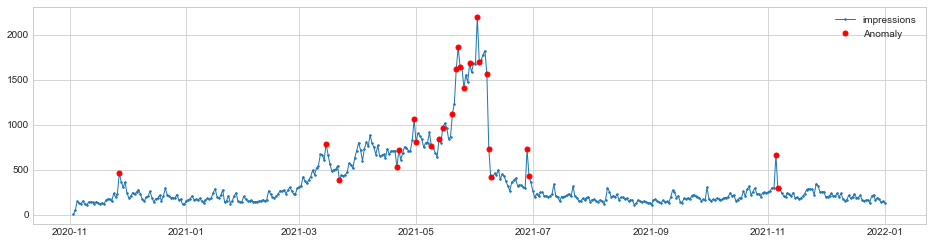

In [18]:
validate_impressions = validate_series(df['impressions'])

persist_ad = PersistAD(c=2, side='both')
anomalies = persist_ad.fit_detect(validate_impressions)

chart = plot(validate_impressions, 
     anomaly=anomalies, 
     ts_linewidth=1, 
     ts_markersize=3, 
     anomaly_markersize=5, 
     anomaly_color='red', 
     anomaly_tag='marker')

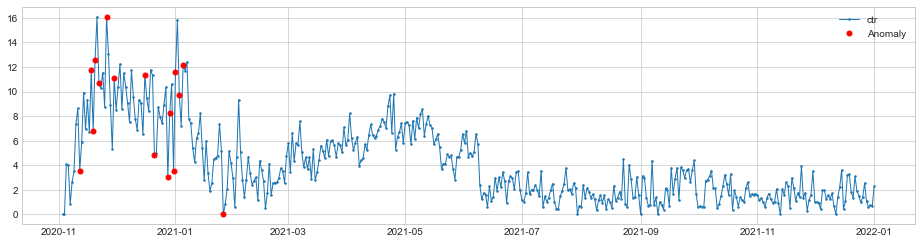

In [19]:
validate_ctr = validate_series(df['ctr'])

persist_ad = PersistAD(c=2, side='both')
anomalies = persist_ad.fit_detect(validate_ctr)

chart = plot(validate_ctr, 
     anomaly=anomalies, 
     ts_linewidth=1, 
     ts_markersize=3, 
     anomaly_markersize=5, 
     anomaly_color='red', 
     anomaly_tag='marker')

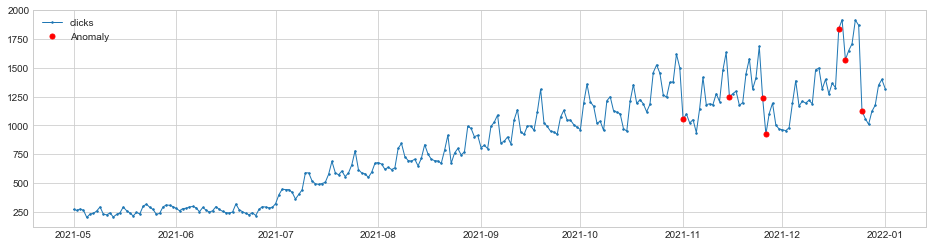

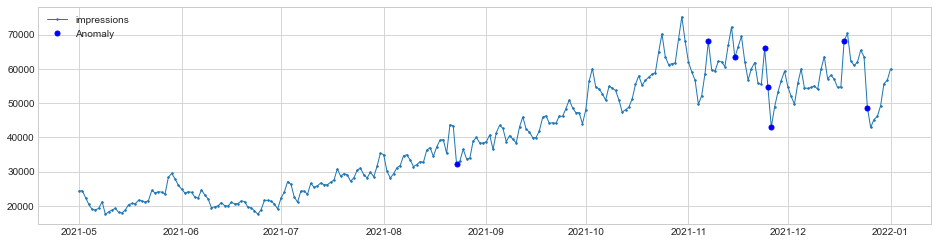

In [12]:
validate_clicks = validate_series(df['clicks'])

persist_ad = PersistAD(c=2, side='both')
anomalies = persist_ad.fit_detect(validate_clicks)

chart = plot(validate_clicks, 
     anomaly=anomalies, 
     ts_linewidth=1, 
     ts_markersize=3, 
     anomaly_markersize=5, 
     anomaly_color='red', 
     anomaly_tag='marker')

validate_impressions = validate_series(df['impressions'])

persist_ad = PersistAD(c=2, side='both')
anomalies = persist_ad.fit_detect(validate_impressions)

chart = plot(validate_impressions, 
     anomaly=anomalies, 
     ts_linewidth=1, 
     ts_markersize=3, 
     anomaly_markersize=5, 
     anomaly_color='blue', 
     anomaly_tag='marker')